### `1. Feature Scaling`

**Definition**: Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

#### **1.1. Why Feature Scaling Matters**

- If range of inputs varies, in some algorithms, object functions will not work properly.
- Gradient descent converges much faster with feature scaling done. Gradient descent is a common optimization algorithm used in logistic regression, SVMs, neural networks etc.
- Algorithms that involve distance calculation like KNN, Clustering are also affected by the magnitude of the feature. Just consider how Euclidean distance is calculated: taking the square root of the sum of the squared differences between observations. This distance can be greatly affected by differences in scale among the variables. Variables with large variances have a larger effect on this measure than variables with small variances.

**Note:** Tree-based algorithms are almost the only algorithms that are not affected by the magnitude of the input, as we can easily see from how trees are built. When deciding how to make a split, tree algorithm look for decisions like "whether feature value X>3.0" and compute the purity of the child node after the split, so the scale of the feature does not count.

#### **1.2. How to Handle Feature Scaling**

| **Method** | **Definition** |
| --- | --- |
| Normalization - Standardization (Z-score scaling) | removes the mean and scales the data to unit variance. <br> $$X_\text{scaled} = \frac{(X - X_\text{mean})} {Stdev}$$ |
| Min-Max scaling | transforms features by scaling each feature to a given range. Default to [0,1]. <br> $$X_\text{scaled} = \frac{(X - X_\text{min})} {(X_\text{max} - X_\text{min})}$$ |
| Robust scaling | 	removes the median and scales the data according to the quantile range (defaults to IQR) <br> $$X_\text{scaled} = \frac{(X - X_\text{median})} {IQR}$$ |

A comparison of three methods when facing outliers: [img source](https://stackoverflow.com/questions/51841506/data-standardization-vs-normalization-vs-robust-scaler)

As we can see, Normalization - Standardization and Min-Max method will compress most data to a narrow range, while robust scaler does a better job at keeping the spread of the data, although it cannot remove the outlier from the processed result. Remember removing/imputing outliers is another topic in data cleaning and should be done beforehand.

Experience on how to choose feature scaling method:

- If your feature is not Gaussian like, say, has a skewed distribution or has outliers, Normalization - Standardization is not a good choice as it will compress most data to a narrow range.
- However, we can transform the feature into Gaussian like and then use Normalization - Standardization. 
- When performing distance or covariance calculation (algorithm like Clustering, PCA and LDA), it is better to use Normalization - Standardization as it will remove the effect of scales on variance and covariance. Explanation here.
- Min-Max scaling has the same drawbacks as Normalization - Standardization, and also new data may not be bounded to [0,1] as they can be out of the original range. Some algorithms, for example some deep learning network prefer input on a 0-1 scale so this is a good choice.

Below is some additional resource on this topic:

- A comparison of the three methods when facing skewed variables can be found [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py).
- An in-depth study of feature scaling can be found [here](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html).

#### **1.3. Applying the Feature Scaling**

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [20]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [21]:
def create_histogram(data):
    fig, ax = plt.subplots(1,2, figsize=(6,3))
    sns.histplot(data=data, x='tip', ax=ax[0])
    sns.histplot(data=data, x='total_bill', ax=ax[1])

    plt.tight_layout()
    plt.show()

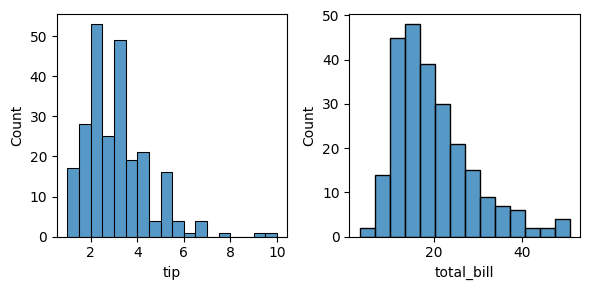

In [22]:
create_histogram(tips)

In [23]:
X = tips[['tip','total_bill']]
X.describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


> MinMaxScaler

- min = 0
- max = 1

In [24]:
from sklearn.preprocessing import MinMaxScaler

#define scaler
scaler = MinMaxScaler()

#fit
scaler.fit(X)

Xminmax = scaler.transform(X)

X_minmax = pd.DataFrame(Xminmax, columns=X.columns)
X_minmax

,tip,total_bill
0,0.001111,0.291579
1,0.073333,0.152283
2,0.277778,0.375786
3,0.256667,0.431713
4,0.290000,0.450775
...,...,...
239,0.546667,0.543779
240,0.111111,0.505027
241,0.111111,0.410557
242,0.083333,0.308965


> StandardScaler

- mean = 0
- std = 1

In [25]:
from sklearn.preprocessing import StandardScaler

#define scaler
scaler = StandardScaler()

#fit
scaler.fit(X)

X_standard = scaler.transform(X)

X_standards = pd.DataFrame(X_standard, columns=X.columns)
X_standards

,tip,total_bill
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745
...,...,...
239,2.115963,1.040511
240,-0.722971,0.832275
241,-0.722971,0.324630
242,-0.904026,-0.221287


In [26]:
X_standards.describe()

,tip,total_bill
count,2.440000e+02,2.440000e+02
mean,2.839259e-16,-7.871663e-17
std,1.002056e+00,1.002056e+00
min,-1.447189e+00,-1.881547e+00
25%,-7.229713e-01,-7.247111e-01
50%,-7.117518e-02,-2.241005e-01
75%,4.086192e-01,4.886857e-01
max,5.070772e+00,3.492068e+00


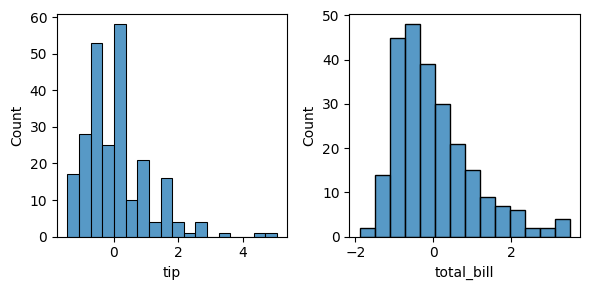

In [27]:
create_histogram(X_standards)

> RobustScaler

- median = 0
- iqr = 1

In [28]:
from sklearn.preprocessing import RobustScaler

#define scaler
scaler = RobustScaler()

#fit
X_robust = scaler.fit_transform(X)

X_robust = pd.DataFrame(X_robust, columns=X.columns)
X_robust

,tip,total_bill
0,-1.2096,-0.074675
1,-0.7936,-0.691558
2,0.3840,0.298237
3,0.2624,0.545918
4,0.4544,0.630334
...,...,...
239,1.9328,1.042208
240,-0.5760,0.870594
241,-0.5760,0.452226
242,-0.7360,0.002319


In [29]:
X_robust.describe()

,tip,total_bill
count,244.000000,2.440000e+02
mean,0.062898,1.846886e-01
std,0.885528,8.258267e-01
min,-1.216000,-1.365955e+00
25%,-0.576000,-4.125696e-01
50%,0.000000,-1.647987e-16
75%,0.424000,5.874304e-01
max,4.544000,3.062616e+00


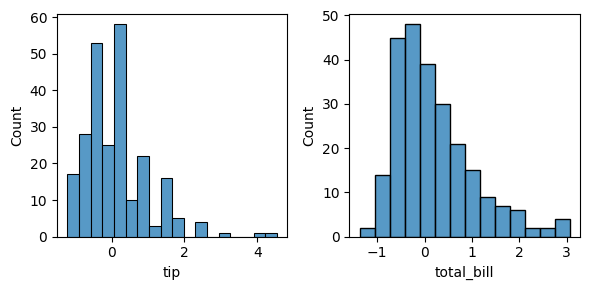

In [30]:
create_histogram(X_robust)

___

### `2. Feature Encoding`

**Definition**: Transform the categorical values of the relevant features into numerical ones.

#### **2.1. Why Feature Encoding Matters**

We must transform strings of categorical variables into numbers so that algorithms can handle those values. Even if you see an algorithm can take into categorical inputs, it's most likely that the algorithm incorporate the encoding process within.

#### **2.2. How to Handle Feature Encoding**

| **Method** | **Definition** |
| --- | --- |
| One-hot encoding | replace the categorical variable by different boolean variables (0/1) to indicate whether or not certain label is true for that observation |
| Ordinal-encoding | replace the labels by some ordinal number if ordinal is meaningful |
| Binary-encoding | similar to onehot, but stores categories as binary bitstrings |

**Note:**

- if we are using one-hot encoding in linear regression, we should keep k-1 binary variable to avoid multicollinearity. This is true for any algorithms that look at all features at the same time during training. Including SVM, neural network and clustering. Tree-based algorithm, on the other hand, need the entire set of binary variable to select the best split.
- it is not recommended to use one-hot encoding with tree algorithms. One-hot will cause the split be highly imbalanced (as each label of the original categorical feature will now be a new feature), and the result is that neither of the two child nodes will have a good gain in purity. The prediction power of the one-hot feature will be weaker than the original feature as they have been broken into many pieces.

#### **2.3. Applying the Feature Encoding**

> One Hot Encoding

One Hot Encoding also can be implemented using sklearn library. We use `OneHotEncoder` and `ColumnTransformer` classes. OneHotEncoder for the one hot encoding method and ColumnTransformer to select which variable to transform.

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [32]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
152,17.26,2.74,Male,No,Sun,Dinner,3
4,24.59,3.61,Female,No,Sun,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
158,13.39,2.61,Female,No,Sun,Dinner,2
40,16.04,2.24,Male,No,Sat,Dinner,3


In [33]:
# tuple -> (nama_proses, fungsi preprocessing, kolom target yang mau dilakukan preprocessing)

# Membuat instance dari OneHotEncoder

# Membuat ColumnTransformer dengan instance OneHotEncoder
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'day', 'time'])
], remainder='passthrough')

# Mengaplikasikan transformasi
tips_encoded = transformer.fit_transform(tips)
col_onehot = transformer.get_feature_names_out()

pd.DataFrame(tips_encoded,columns=col_onehot)


,onehot__sex_Male,onehot__smoker_Yes,onehot__day_Sat,onehot__day_Sun,onehot__day_Thur,onehot__time_Lunch,remainder__total_bill,remainder__tip,remainder__size
0,0.0,0.0,0.0,1.0,0.0,0.0,16.99,1.01,2.0
1,1.0,0.0,0.0,1.0,0.0,0.0,10.34,1.66,3.0
2,1.0,0.0,0.0,1.0,0.0,0.0,21.01,3.50,3.0
3,1.0,0.0,0.0,1.0,0.0,0.0,23.68,3.31,2.0
4,0.0,0.0,0.0,1.0,0.0,0.0,24.59,3.61,4.0
...,...,...,...,...,...,...,...,...,...
239,1.0,0.0,1.0,0.0,0.0,0.0,29.03,5.92,3.0
240,0.0,1.0,1.0,0.0,0.0,0.0,27.18,2.00,2.0
241,1.0,1.0,1.0,0.0,0.0,0.0,22.67,2.00,2.0
242,1.0,0.0,1.0,0.0,0.0,0.0,17.82,1.75,2.0


> Ordinal Encoding

In [34]:
from category_encoders import OrdinalEncoder,BinaryEncoder

In [35]:
tips['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [36]:
ordinal_mapping = [
    {'col':'day','mapping':{None:0,'Thur':1,'Fri':2,'Sat':3,'Sun':4}},
    {'col':'time','mapping':{None:0,'Lunch':1,'Dinner':2}},
]

In [37]:
ordinal_mapping

[{'col': 'day', 'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4}},
 {'col': 'time', 'mapping': {None: 0, 'Lunch': 1, 'Dinner': 2}}]

In [38]:
transformer = ColumnTransformer([
    ('ordinal', OrdinalEncoder(cols=['day','time'],mapping=ordinal_mapping), ['day', 'time'])
], remainder='passthrough')

# Mengaplikasikan transformasi
tips_encoded = transformer.fit_transform(tips)
#col_ordinal = transformer.transformer.transformers_

pd.DataFrame(tips_encoded)


,0,1,2,3,4,5,6
0,4,2,16.99,1.01,Female,No,2
1,4,2,10.34,1.66,Male,No,3
2,4,2,21.01,3.5,Male,No,3
3,4,2,23.68,3.31,Male,No,2
4,4,2,24.59,3.61,Female,No,4
...,...,...,...,...,...,...,...
239,3,2,29.03,5.92,Male,No,3
240,3,2,27.18,2.0,Female,Yes,2
241,3,2,22.67,2.0,Male,Yes,2
242,3,2,17.82,1.75,Male,No,2


In [39]:
transformer.transformers_[0][1].get_feature_names()

c:\Users\Fiki\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


array(['day', 'time'], dtype=object)

> Binary Encoding

Binary encoding using category_encoder library. We will implement binary encoding using the category_encoders library. We will implement binary encoding to day variable.

In [40]:
transformer = ColumnTransformer([
    ('binary', BinaryEncoder(),['day', 'time'])
], remainder='passthrough')

# Mengaplikasikan transformasi
tips_encoded = transformer.fit_transform(tips)
#col_ordinal = transformer.transformer.transformers_

pd.DataFrame(tips_encoded)

,0,1,2,3,4,5,6,7,8,9
0,0,0,1,0,1,16.99,1.01,Female,No,2
1,0,0,1,0,1,10.34,1.66,Male,No,3
2,0,0,1,0,1,21.01,3.5,Male,No,3
3,0,0,1,0,1,23.68,3.31,Male,No,2
4,0,0,1,0,1,24.59,3.61,Female,No,4
...,...,...,...,...,...,...,...,...,...,...
239,0,1,0,0,1,29.03,5.92,Male,No,3
240,0,1,0,0,1,27.18,2.0,Female,Yes,2
241,0,1,0,0,1,22.67,2.0,Male,Yes,2
242,0,1,0,0,1,17.82,1.75,Male,No,2


___

### `3. Application`

`Data Cleaning`

**Duplicated Value**, Deteksi dan kuantifikasi duplikasi data

In [41]:
print(f'jumlah data duplikat : {tips.duplicated().sum()}')
print(f'persentase jumlah data duplikat : {tips.duplicated().sum()/len(tips)*100:.2f}%')

jumlah data duplikat : 1
persentase jumlah data duplikat : 0.41%


Sebesar 0.41% data terindikasi duplikat, maka hilangkan salah satunya.

Handling duplikasi data:

In [42]:
tips.drop_duplicates(keep='first',inplace=True, ignore_index=True) #supaya indexnya tetap urut

**Missing Value**, Deteksi dan kuantifikasi missing value

In [43]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,29.03,5.92,Male,No,Sat,Dinner,3
239,27.18,2.00,Female,Yes,Sat,Dinner,2
240,22.67,2.00,Male,Yes,Sat,Dinner,2
241,17.82,1.75,Male,No,Sat,Dinner,2


In [44]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Tidak terdapat missing value.

**Outlier**, adalah titik data yang secara signifikan berbeda dari data lainnya. Model linier, khususnya regresi linier, sensitif terhadap outlier. Oleh karena itu, kita perlu mendeteksi dan menangani outlier.

Pertama, coba deteksi dan kuantifikasi outlier secara univariate.

In [45]:
numerical = [var for var in tips.columns if tips[var].dtype != 'category']

In [46]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    category
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [47]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(tips, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(tips[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,total_bill,9,3.70,-2.8125,40.3675
1,tip,8,3.29,-0.3625,5.9375
2,size,9,3.70,0.5000,4.5000


Terdapat outlier sekitar 3.29 ~ 3.7% pada kolom total_bill, tip, dan size. Dalam kasus ini kita akan coba hilangkan dulu outlier.

In [48]:
for i, row in outlier_df.iterrows():
    tips = tips[(tips[row['Column']]> row['Lower Bound']) & (tips[row['Column']]< row['Upper Bound'])]


`Data Splitting`

Bagi dataset menjadi train dan test set dengan komposisi 80:20.

In [49]:
from sklearn.model_selection import train_test_split

X = tips.drop(columns=['tip'])
y = tips['tip']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=0)
X_train.shape, X_test.shape


((178, 6), (45, 6))

In [50]:
X_train

,total_bill,sex,smoker,day,time,size
34,17.78,Male,No,Sat,Dinner,2
152,17.26,Male,No,Sun,Dinner,3
237,35.83,Female,No,Sat,Dinner,3
219,12.16,Male,Yes,Fri,Lunch,2
146,18.64,Female,No,Thur,Lunch,3
...,...,...,...,...,...,...
70,12.02,Male,No,Sat,Dinner,2
209,30.06,Male,Yes,Sat,Dinner,3
121,13.42,Female,No,Thur,Lunch,2
49,18.04,Male,No,Sun,Dinner,2


`Data Preprocessing`

**Encoding**

Selanjutnya kita akan mengubah variabel kategorikal menjadi variabel numerikal.

- One Hot Encoding: `sex, smoker`
- Ordinal Encoding: `day`
- Binary Encoding: `time` (untuk kebutuhan latihan)

In [51]:
ordinal_mapping = [
    {'col':'day','mapping':{None:0,'Thur':1,'Fri':2,'Sat':3,'Sun':4}},
]

In [52]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'),['sex', 'smoker']),
    ('ordinal', OrdinalEncoder(cols=['day'],mapping=ordinal_mapping),['day']),
    ('binary', BinaryEncoder(),['time'])
], remainder='passthrough')

transformer
# # Mengaplikasikan transformasi
# tips_encoded = transformer.fit_transform(tips)
# #col_ordinal = transformer.transformer.transformers_

# pd.DataFrame(tips_encoded)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['sex', 'smoker']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['day'],
                                                mapping=[{'col': 'day',
                                                          'data_type': dtype('O'),
                                                          'mapping': None    0
Thur    1
Fri     2
Sat     3
Sun     4
dtype: int64}]),
                                 ['day']),
                                ('binary', BinaryEncoder(), ['time'])])

In [53]:
#fitting
transformer.fit(X_train)
#transforming
X_train_encode = transformer.transform(X_train)
X_test_encode = transformer.transform(X_test)

In [54]:
X_train_encode

array([[ 1.  ,  0.  ,  3.  , ...,  1.  , 17.78,  2.  ],
       [ 1.  ,  0.  ,  4.  , ...,  1.  , 17.26,  3.  ],
       [ 0.  ,  0.  ,  3.  , ...,  1.  , 35.83,  3.  ],
       ...,
       [ 0.  ,  0.  ,  1.  , ...,  0.  , 13.42,  2.  ],
       [ 1.  ,  0.  ,  4.  , ...,  1.  , 18.04,  2.  ],
       [ 0.  ,  1.  ,  4.  , ...,  1.  , 18.15,  3.  ]])

**Scaling**

Selanjutnya kita akan melakukan scaling misal dengan menggunakan RobustScaler.

In [55]:
# define scaler
scaler = RobustScaler()
#fit
scaler.fit(X_train_encode)
#transform
X_train_encoded_scaled = scaler.transform(X_train_encode)
X_test_encoded_scaled = scaler.transform(X_test_encode)

Selanjutnya kita akan mengubah data tersebut ke dalam dataframe

In [56]:
X_train_encoded_scaled

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.09020902,  0.        ],
       [ 0.        ,  0.        ,  0.33333333, ...,  0.        ,
         0.0330033 ,  1.        ],
       [-1.        ,  0.        ,  0.        , ...,  0.        ,
         2.07590759,  1.        ],
       ...,
       [-1.        ,  0.        , -0.66666667, ..., -1.        ,
        -0.38943894,  0.        ],
       [ 0.        ,  0.        ,  0.33333333, ...,  0.        ,
         0.11881188,  0.        ],
       [-1.        ,  1.        ,  0.33333333, ...,  0.        ,
         0.13091309,  1.        ]])

In [57]:
feature_names = transformer.get_feature_names_out()

In [58]:
feature_names

array(['onehot__sex_Male', 'onehot__smoker_Yes', 'ordinal__day',
       'binary__time_0', 'binary__time_1', 'remainder__total_bill',
       'remainder__size'], dtype=object)

In [59]:
transformer.transformers_[0]

('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker'])

In [60]:
# col_onehot = transformer.transformers_[0][1].get_feature_names_out()
# col_ordinal = transformer.transformers_[1][1].get_feature_names_out()
# col_binary = transformer.transformers_[2][1].get_feature_names_out()
# col_remainder = transformer.transformers_[3][1].get_feature_names_out()

In [61]:
# feature_names = col_onehot+col_ordinal+col_binary+col_remainder

In [62]:
X_train_prep = pd.DataFrame(X_train_encoded_scaled,columns=feature_names).reset_index(drop=True)
X_test_prep = pd.DataFrame(X_test_encoded_scaled,columns=feature_names)

In [63]:
# transformer.transformers_[0][1].get_feature_names_out()

### `Modeling`

**Multiple Linear Regression**

In [64]:
import statsmodels.api as sm 
from statsmodels.compat import lzip
from sklearn.metrics import mean_squared_error

In [65]:
y_train_aligned = y_train.reset_index(drop=True)
X_train_aligned = X_train_prep.reset_index(drop=True)

multipleLR = sm.OLS(y_train_aligned, sm.add_constant(X_train_aligned))
multipleLR_result = multipleLR.fit()

Prediksi pada test set dengan menggunakan multiple linear regression

In [66]:
y_pred = multipleLR_result.predict(sm.add_constant(X_test_prep))

print(f'MSE : {mean_squared_error(y_test,y_pred)}')
print(f'RMSE : {mean_squared_error(y_test,y_pred,squared=True)}')

MSE : 0.6619103643994018
RMSE : 0.6619103643994018


c:\Users\Fiki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Interpretation**

In [69]:
print(multipleLR_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     17.99
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           3.96e-16
Time:                        16:32:42   Log-Likelihood:                -226.50
No. Observations:                 178   AIC:                             467.0
Df Residuals:                     171   BIC:                             489.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.62

`Persamaan regresi linear:`

$$Tips = 2.6267 + 0.8764 * Totalbill - 0.0963 * sexMale - 0.0619 * smokerYes$$ 
$$+ 0.1895 * time_0 - 0.1895 * time_1 + 0.6132 * day + 0.035 * size$$

`R-Squared:`
- 39.2% variance dari tip dapat dijelaskan oleh features yang terdapat dalam model. Sisanya sebesar 60.8% dapat dijelaskan oleh features/ variabel lain yang tidak ada di dalam model.

`F-test (Simultant test):`
- Prob (F-statistic) / pvalue = 2.05e-16 < 0.05. Reject Ho. Minimal ada 1 feature yang berpengaruh signifikan terhadap tip, tetapi kita tidak tahu yang mana.

`t-test (Partial test)`
- $\beta_{0}$ (const) --> pvalue = 0.000. Reject Ho. Model membutuhkan intercept.
- $\beta_{1}$ (sex_Male) --> pvalue = 0.5. Fail to reject Ho. sex_Female tidak berpengaruh signifikan terhadap tip.
- $\beta_{2}$ (smoker_Yes) --> pvalue = 0.662. Fail to reject Ho. smoker_Yes tidak berpengaruh signifikan terhadap tip.
- $\beta_{3}$ (time_0) --> pvalue = 0.226. Fail to reject Ho. time_0 tidak berpengaruh signifikan terhadap tip.
- $\beta_{4}$ (time_1) --> pvalue = 0.226. Fail to reject Ho. time_1 tidak berpengaruh signifikan terhadap tip.
- $\beta_{5}$ (day) --> pvalue = 0.098. Fail to reject Ho. day tidak berpengaruh signifikan terhadap tip.
- $\beta_{6}$ (total bill) --> pvalue = 0.000. Reject Ho. Total bill berpengaruh signifikan terhadap tip.
- $\beta_{7}$ (size) --> pvalue = 0.974. Fail to reject Ho. size tidak berpengaruh signifikan terhadap tip.

`Parameter Estimate:`
- **const = 2.6267**: Ketika feature lain bernilai 0, maka nilai tip sebesar 2.6267 (meskipun kasus ini tidak mungkin, tetapi kita cukup tahu bahwa model membutuhkan intercept)
- **sex_Male =  -0.0963**:  Rata-rata tip dari pelanggan pria lebih kecil 0.0963 dollar dibandingkan tip yang diberikan pelanggan wanita
- **smoker_Yes = -0.0619**. Rata-rata tip yang diberikan pelanggan yang merokok lebih kecil 0.0619 dollar dibandingkan tip yang diberikan pelanggan yang TIDAK merokok.
- **time_0 = 0.1895**. Jika time_0 bernilai True maka tips bertambah 0.1895 dollar.
- **time_1 = -0.1895**. Jika time_1 bernilai True maka tips berkurang 0.1895 dollar.
- **day = 0.6132**. Tip yang diperoleh karyawan akan naik $0.6132 pada hari Kamis, 1.2264 pada hari Jumat, 1.8396 pada hari Sabtu, dan 2.4528 pada hari Minggu.
- **Total bill = 0.8764**: Tiap penambahan $1 pada total bill, tip yang diperoleh karyawan naik $0.8764.
- **size = 0.0035**. Tiap penambahan 1 orang pada size, tip yang diperoleh karyawan naik $0.0035.

`Limitasi model:`
- Hasil prediksi model hanya valid untuk rentang `total_bill` $3.07 - $40.17
- Hasil prediksi model hanya valid untuk `sex` Male dan Female
- Hasil prediksi model hanya valid untuk `smoker` Yes dan No
- Hasil prediksi model hanya valid untuk `day` Thur, Fri, Sat dan Sun
- Hasil prediksi model hanya valid untuk rentang `size` dari 1 hingga 4 orang.


`Residual:`

In [71]:
name = ['Lagrange Multiplier Stat', 'P-Val']
test = sm.stats.het_breuschpagan(multipleLR_result.resid, multipleLR_result.model.exog)
list(zip(name,test))

[('Lagrange Multiplier Stat', np.float64(22.200020798494922)),
 ('P-Val', np.float64(0.002346314869124208))]

In [72]:
multipleLR_result.resid.mean()

np.float64(5.638436035174952e-16)

In [73]:
df_result = pd.DataFrame({
    'coef' : multipleLR_result.params
}).reset_index().sort_values('coef')

In [74]:
df_result

,index,coef
5,binary__time_1,-0.205130
1,onehot__sex_Male,-0.077912
2,onehot__smoker_Yes,-0.036332
7,remainder__size,0.021416
4,binary__time_0,0.205130
3,ordinal__day,0.603340
6,remainder__total_bill,0.857568
0,const,2.623603


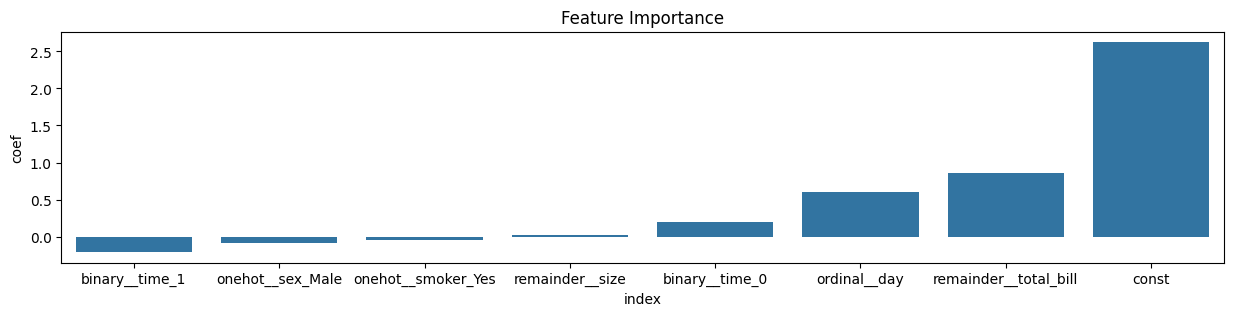

In [76]:
plt.figure(figsize=(15,3))
sns.barplot(data=df_result,x='index',y='coef')
plt.title('Feature Importance')
plt.show()

Text(0, 0.5, 'Residuals')

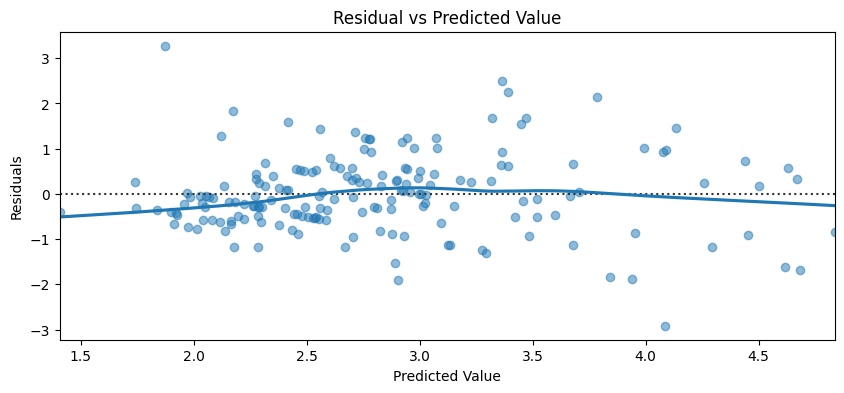

In [67]:
plt.figure(figsize=(10,4))

plot = sns.residplot(
    x=multipleLR_result.fittedvalues,                  # y_pred
    y=y_train,
    lowess=True,                                        # menambahkan garis                     
    scatter_kws={'alpha':0.5}                           # mengatur transparansi
)

plot.set_title('Residual vs Predicted Value')
plot.set_xlabel('Predicted Value')
plot.set_ylabel('Residuals')

- **Residual Mean**: -7.709189092340974e-16 (mendekati 0)
- **Prob(JB) < 0.05**: Distribusi normal
- **Durbin-Watson ~= 2**: Uncorrelated
- **Prop(BP-test) < 0.05**: Homoscedasticity